<a href="https://colab.research.google.com/github/lexxai/goit_python_ds_hw_02/blob/main/Hw2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Частина перша: Знайомство з Pandas



In [28]:
import pandas as pd

URL="https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
TABLE_NAME = "Коефіцієнт народжуваності в регіонах України"
data = pd.read_html(URL, match=TABLE_NAME, thousands="", decimal=',')
if data:
  df= data[0]
assert df is not None, "DATA NOT READ FROM THE WIKI"

# Вивести перші рядки таблиці за допомогою методу head

In [29]:
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [30]:
print(df.shape)

(28, 9)


# Замініть у таблиці значення "—" на значення NaN

In [31]:
print(df.where(df=="—").head(5))

filtered_df = df[df.apply(lambda row: '—' in row.values, axis=1)]
print(filtered_df.head())

df=df.replace("—", "NaN")
print(df.head())


  Регіон  1950  1960  1970  1990  2000  2012 2014 2019
0    NaN   NaN   NaN   NaN   NaN   NaN   NaN    —    —
1    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN
2    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN
3    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN
4    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN    —
         Регіон  1950  1960  1970  1990  2000  2012 2014 2019
0          Крим  23.0  20.6  16.0  13.0   7.3  12.6    —    —
4      Донецька  27.1  21.4  14.0  10.9   6.1   9.8  8.2    —
11    Луганська  26.2  23.5  14.4  11.6   6.2   9.6  5.1    —
26  Севастополь   NaN   NaN   NaN  12.5   7.0  12.0    —    —
             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька 

# Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [32]:
print(df[df.columns].dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [33]:
print(df[df.columns[1:]].dtypes)
df[df.columns[1:]] = df[df.columns[1:]].apply(pd.to_numeric, errors='coerce')
print()
print(df.dtypes)

1950    float64
1960    float64
1970    float64
1990    float64
2000    float64
2012    float64
2014     object
2019     object
dtype: object

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [34]:
df.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

# Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [35]:
print(df.tail())
print(df.shape)
df=df.iloc[:-1]
print(df.shape)
print(df.tail())

          Регіон  1950  1960  1970  1990  2000  2012  2014  2019
23   Чернівецька  24.7  21.8  17.0  14.8  10.1  12.8  12.9   9.2
24  Чернігівська  22.0  18.3  12.7  10.8   6.9   9.4   9.0   6.1
25          Київ   NaN  17.4  15.9  12.0   7.3  12.0  12.1  11.0
26   Севастополь   NaN   NaN   NaN  12.5   7.0  12.0   NaN   NaN
27       Україна  22.8  20.5  15.2  12.6   7.8  11.4  11.1   8.1
(28, 9)
(27, 9)
          Регіон  1950  1960  1970  1990  2000  2012  2014  2019
22     Черкаська  20.5  17.9  14.4  12.3   7.5  10.0   9.8   6.4
23   Чернівецька  24.7  21.8  17.0  14.8  10.1  12.8  12.9   9.2
24  Чернігівська  22.0  18.3  12.7  10.8   6.9   9.4   9.0   6.1
25          Київ   NaN  17.4  15.9  12.0   7.3  12.0  12.1  11.0
26   Севастополь   NaN   NaN   NaN  12.5   7.0  12.0   NaN   NaN


# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [36]:
df=df.fillna(df.mean(numeric_only=True))
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000,20.600000,16.0,13.0,7.3,12.6,11.144,8.017391
1,Вінницька,22.400,19.200000,14.2,12.4,8.4,11.2,10.900,7.600000
2,Волинська,24.700,25.000000,17.9,15.3,11.2,14.8,14.100,10.100000
3,Дніпропетровська,20.400,20.400000,15.1,12.3,7.1,11.2,11.100,7.100000
4,Донецька,27.100,21.400000,14.0,10.9,6.1,9.8,8.200,8.017391
5,Житомирська,26.100,22.300000,15.9,12.9,8.9,12.2,12.000,7.900000
6,Закарпатська,31.400,27.300000,20.7,16.8,11.5,15.1,14.600,10.400000
7,Запорізька,21.900,19.700000,15.0,12.4,7.1,10.6,10.600,6.800000
8,Івано-Франківська,24.300,24.800000,18.2,15.5,10.3,12.4,12.200,8.800000
9,Київська,20.400,18.900000,15.6,12.3,7.3,12.2,12.100,8.000000


# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [37]:
m = df.mean(numeric_only=True)
print(m)
print()
print(m.mean(numeric_only=True))

1950    23.104000
1960    20.757692
1970    15.600000
1990    13.059259
2000     8.222222
2012    11.655556
2014    11.144000
2019     8.017391
dtype: float64

13.945015081134647


In [38]:
m = df['2019'].mean()
m

8.017391304347827

In [39]:
df[ df['2019'] >= df['2019'].mean()][["Регіон", '2019']].sort_values(by='2019',ascending=False)

,Регіон,2019
25,Київ,11.000000
16,Рівненська,10.700000
6,Закарпатська,10.400000
2,Волинська,10.100000
23,Чернівецька,9.200000
8,Івано-Франківська,8.800000
14,Одеська,8.800000
12,Львівська,8.700000
20,Херсонська,8.100000
0,Крим,8.017391


# У якому регіоні була найвища народжуваність у 2014 році?

In [40]:
df['2014'].idxmax()

16

In [41]:
df.iloc[df['2014'].idxmax()][["Регіон"]]

Регіон    Рівненська
Name: 16, dtype: object

# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

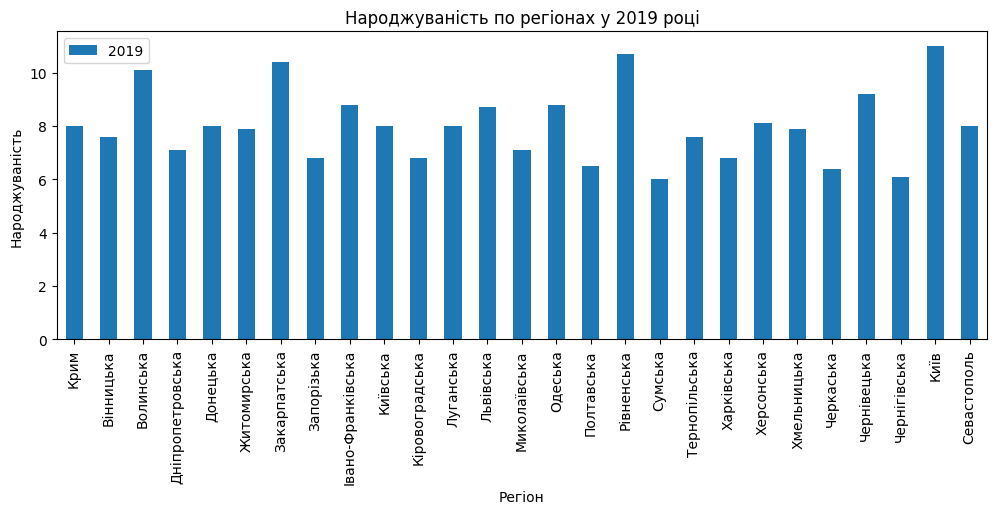

In [42]:
import matplotlib.pyplot as plt

pl = df[["Регіон",'2019']].plot(figsize=(12,4),kind="bar", x="Регіон", ylabel="Народжуваність", title="Народжуваність по регіонах у 2019 році")
plt.show()

# Візуалізація

## додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
#mport seaborn as sns

# sns.set_style("darkgrid")

In [44]:
df.head(2)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.144,8.017391
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.900,7.600000


In [45]:
df.iloc[0]

Регіон        Крим
1950          23.0
1960          20.6
1970          16.0
1990          13.0
2000           7.3
2012          12.6
2014        11.144
2019      8.017391
Name: 0, dtype: object

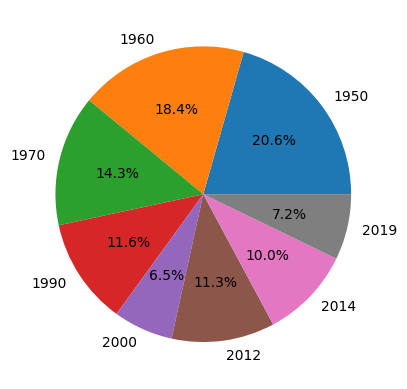

In [46]:
row = df.iloc[0]
plt.pie(row[1:], labels=df.columns[1:], autopct='%1.1f%%')
plt.show()

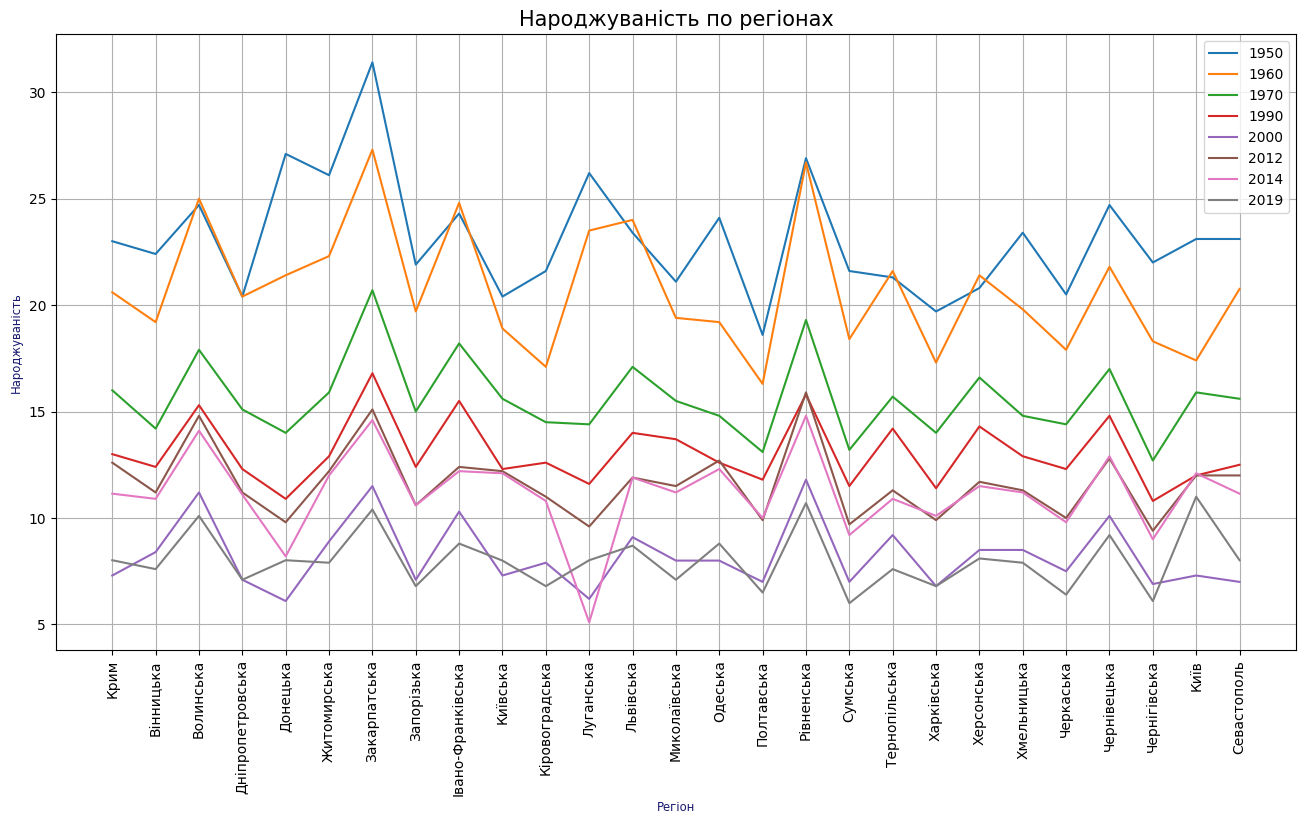

In [47]:
plt.figure(figsize=(16,8))


ax=plt.plot(df["Регіон"],df[df.columns[1:]], label=df.columns[1:])
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("Народжуваність", fontsize="small", color="midnightblue")
plt.title("Народжуваність по регіонах", fontsize=15)
plt.show()

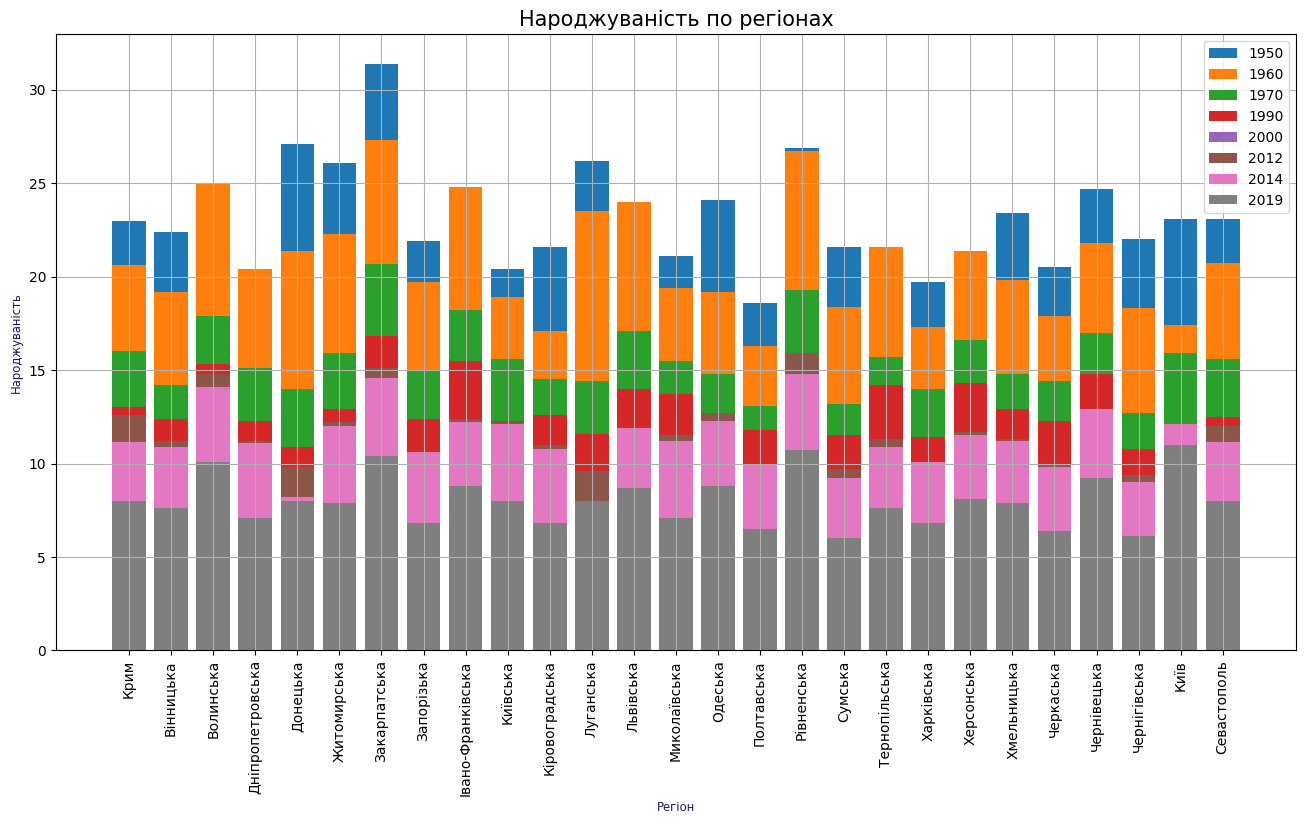

In [48]:
plt.figure(figsize=(16,8))

colnames = df.columns[1:]

for col in colnames:
  plt.bar(df["Регіон"],df[col],label=col)

plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("Народжуваність", fontsize="small", color="midnightblue")
plt.title("Народжуваність по регіонах", fontsize=15)
plt.show()

[[0.12156863 0.46666667 0.70588235 1.        ]]
[[1.         0.49803922 0.05490196 1.        ]]
[[0.17254902 0.62745098 0.17254902 1.        ]]
[[0.83921569 0.15294118 0.15686275 1.        ]]
[[0.58039216 0.40392157 0.74117647 1.        ]]
[[0.54901961 0.3372549  0.29411765 1.        ]]
[[0.89019608 0.46666667 0.76078431 1.        ]]
[[0.49803922 0.49803922 0.49803922 1.        ]]


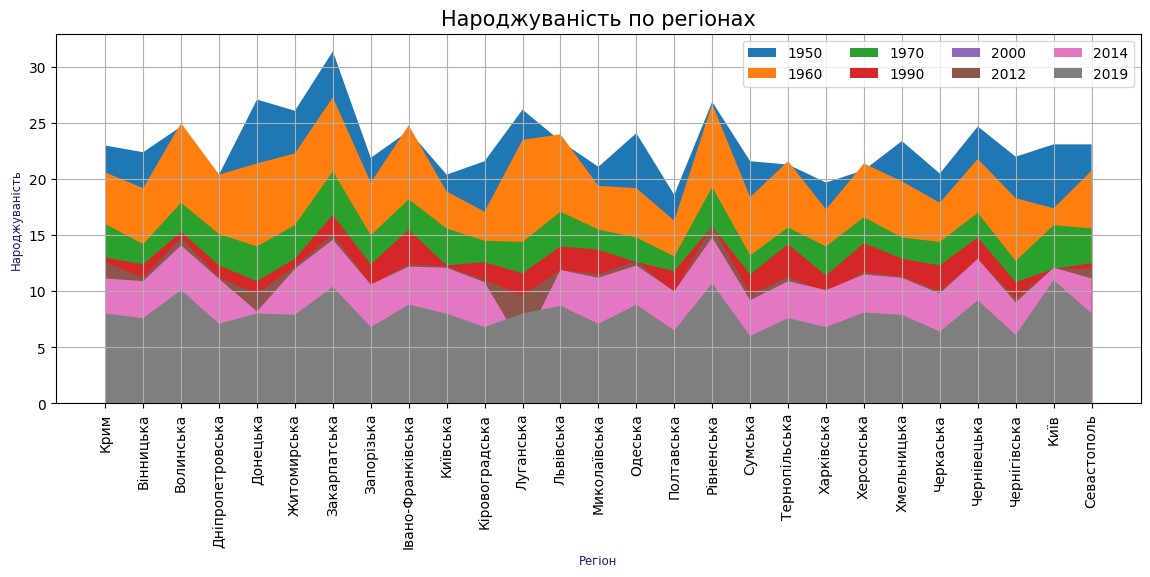

In [49]:
#plt.figure(figsize=(14,4))

colnames = df.columns[1:]

f, ax = plt.subplots()
f.set_figwidth(14)

for col in colnames:
  ax2 = ax.stackplot(df["Регіон"],df[col], labels=[col])
  color = ax2[0].get_facecolor()
  print(color)

plt.xticks(rotation=90)
plt.legend(loc='best', ncols=colnames.size/2)
plt.grid()
plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("Народжуваність", fontsize="small", color="midnightblue")
plt.title("Народжуваність по регіонах", fontsize=15)
plt.show()